# TI3130: Exploratory Data Analysis &mdash; Exercises
**Julián Urbano, Jing Sun &mdash; November 2023**

In [1]:
import sys
import numpy as np
import pandas as pd
from plotnine import *
from plotnine import __version__ as p9__version__
from datetime import datetime
print("python", sys.version,
      "\nnumpy", np.__version__,
      "\npandas", pd.__version__,
      "\nplotnine", p9__version__)

python 3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)] 
numpy 1.26.1 
pandas 2.1.3 
plotnine 0.12.4


For these exercises we will use the _AirBnB Berlin_, _Diamonds_ and _Amsterdam Lite_ datasets. Please refer to their HTML files for a description of the variables.

In [2]:
listings = pd.read_csv('airbnb_listings.csv')
diamonds = pd.read_csv('diamonds.csv')
ams = pd.read_csv('amsterdam_lite.csv')

**1) Visualize the distribution of `neighborhood_group`s in a vertical barplot. Plot their names along the _x_ axis in _vertical_. Tip: you will need function [`element_text`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.element_text.html) in conjunction with function [`theme`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.theme.html).**

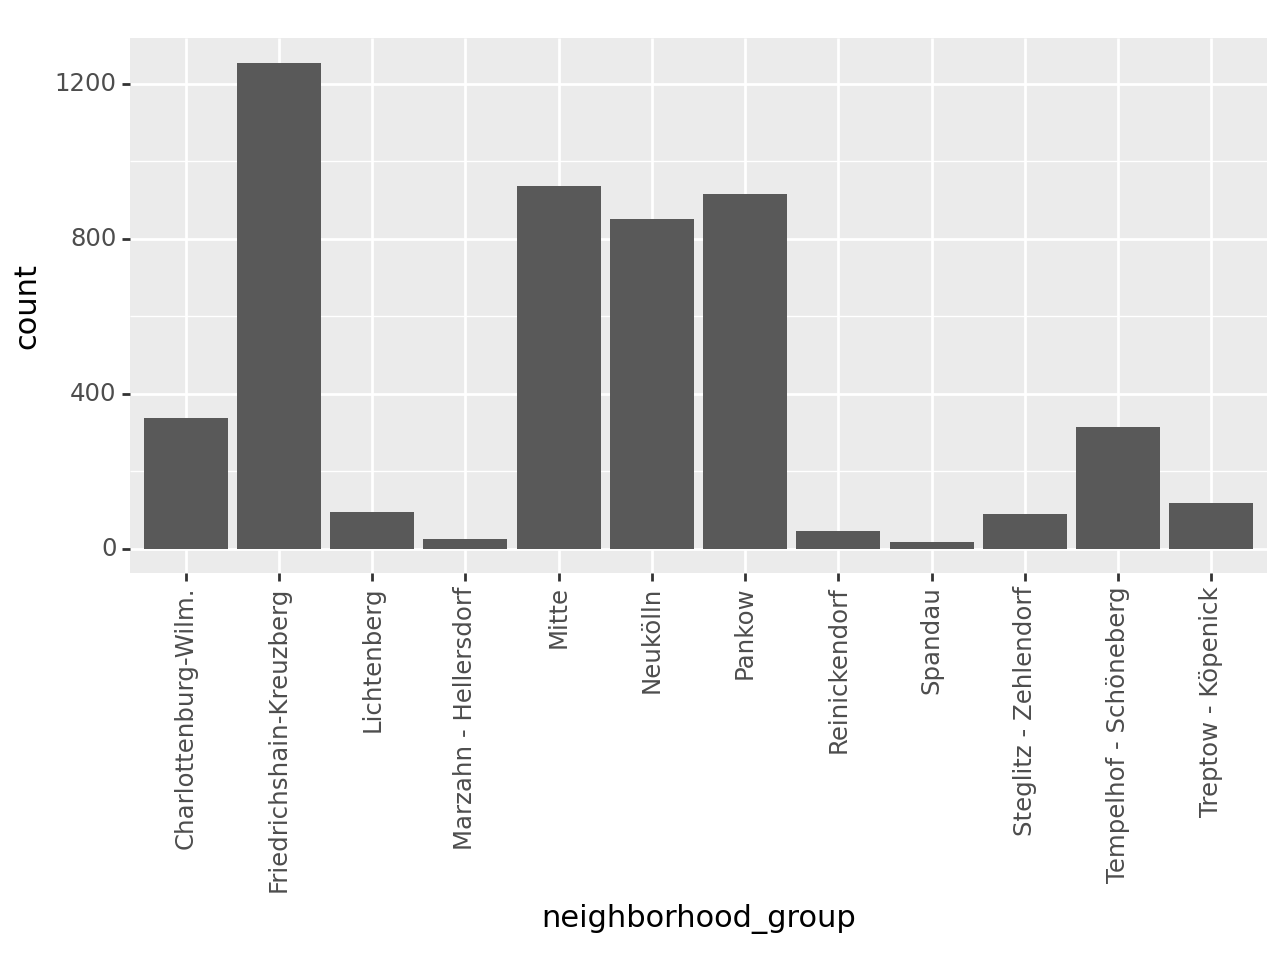

<Figure Size: (640 x 480)>

In [3]:
ggplot(listings, aes('neighborhood_group')) + \
    geom_bar() + \
    theme(axis_text_x=element_text(angle=90))

**2) The default density plot of `latitude` shows a bump at around `latitude = 52.53`. Modify the plot in the slightest way such that the bump disappears but the overall shape of the distribution remains. Is it a good idea to do this?**

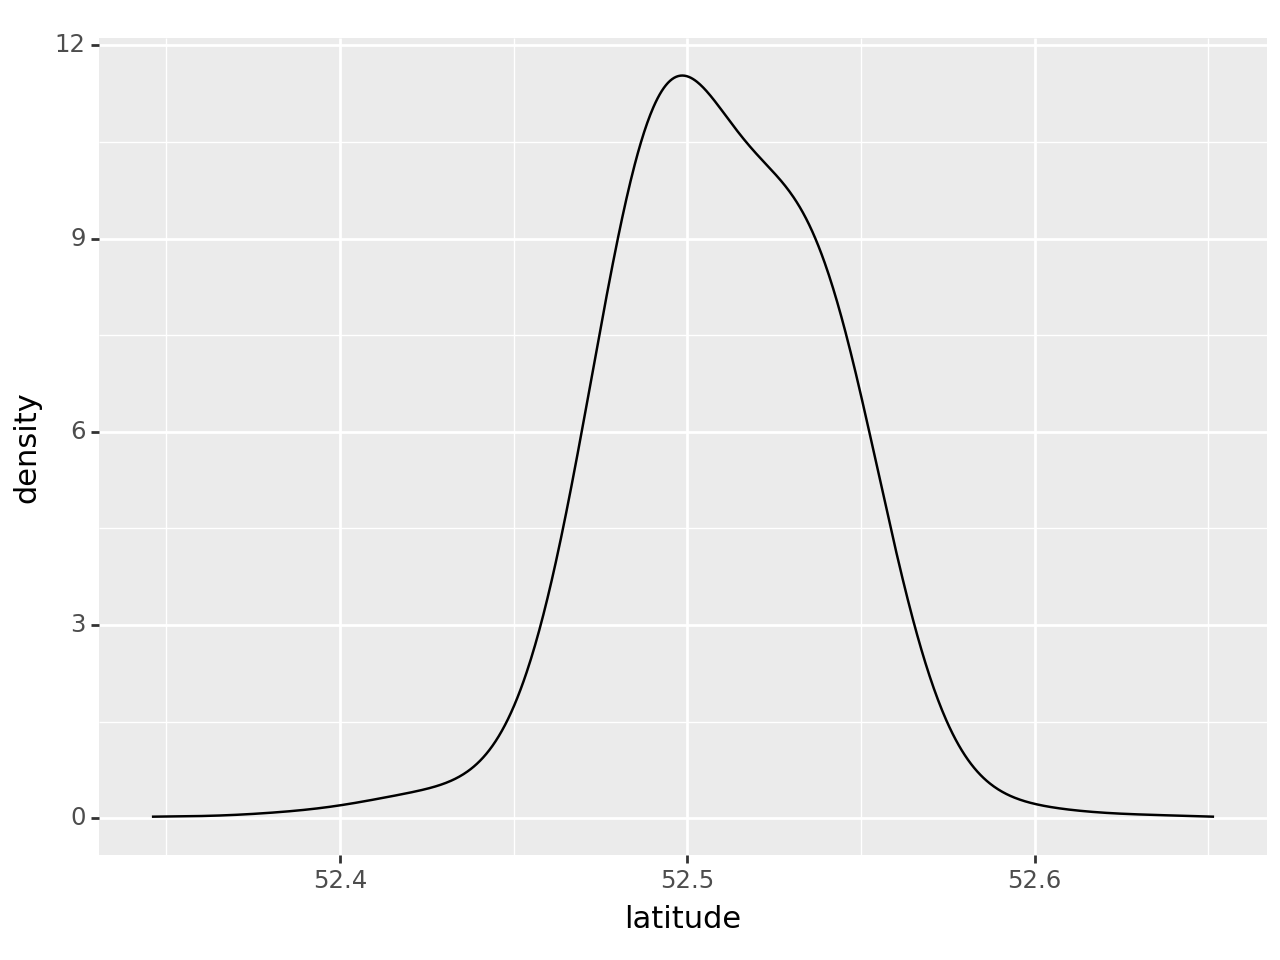

<Figure Size: (640 x 480)>

In [4]:
ggplot(listings, aes('latitude')) + \
    geom_density(bw=0.015)

# It is not a good idea to to this,
# because we loose valuable information on the distribution.

**3) Make a barplot to easily compare, for each diamond `cut`, the number of diamonds of a specific `clarity`.**

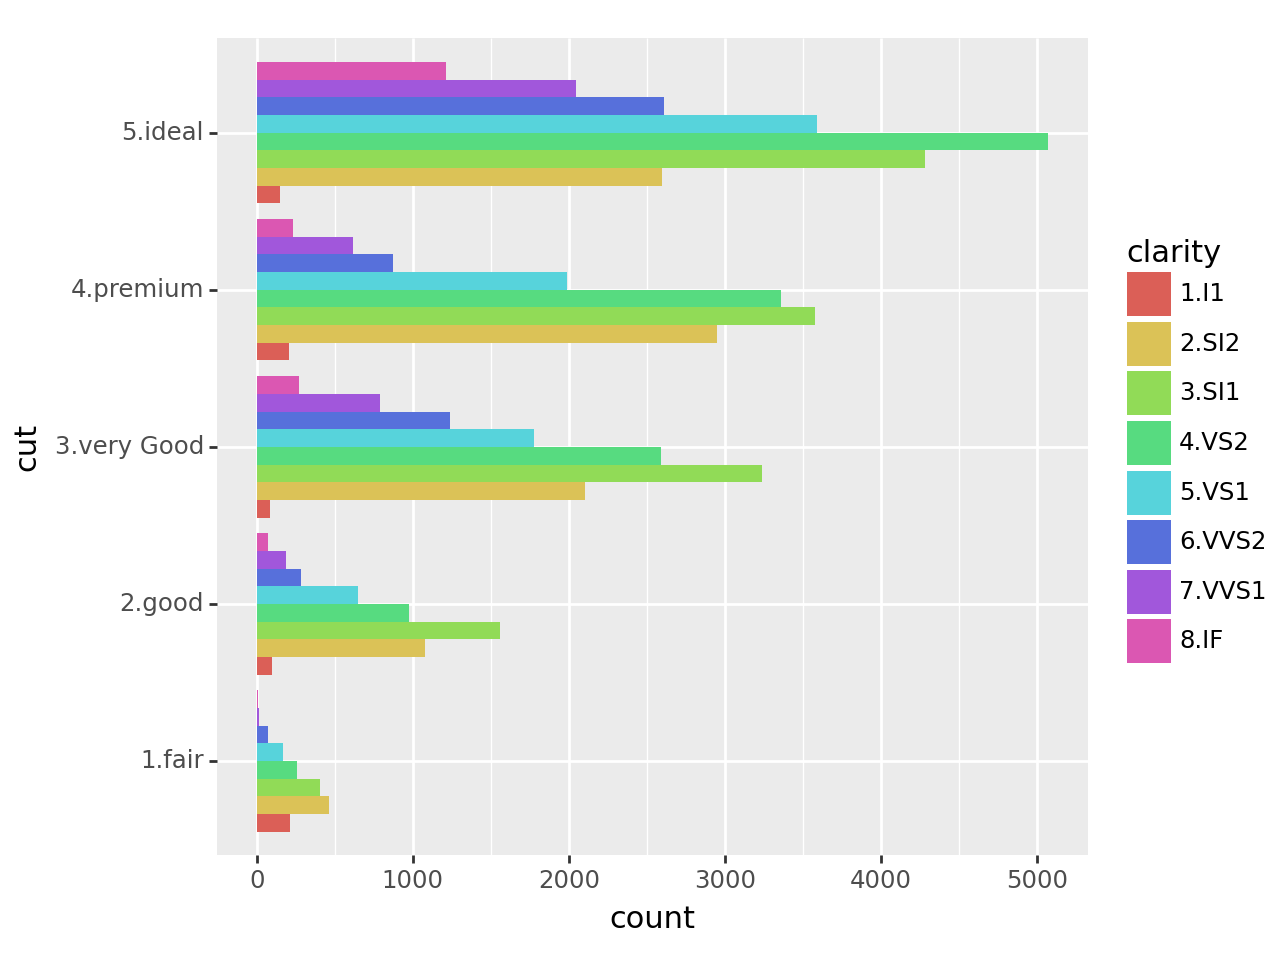

<Figure Size: (640 x 480)>

In [5]:
ggplot(diamonds, aes('cut', fill='clarity')) + \
    geom_bar(position='dodge') + \
    coord_flip()

**4) Which variable seems to have the largest impact on a listing's `price`: `neighborhood_group` or `room_type`? Why? Consider only listings cheaper than 200€/night. Tip: you can answer this by looking at boxplots, for example.**

c:\Users\EgleS\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 74 rows containing non-finite values.
c:\Users\EgleS\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\geoms\geom_crossbar.py:108: PlotnineWarning: Notch went outside the hinges. Try setting notch=False.
c:\Users\EgleS\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\geoms\geom_crossbar.py:108: PlotnineWarning: Notch went outside the hinges. Try setting notch=False.
c:\Users\EgleS\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\geoms\geom_crossbar.py:108: PlotnineWarning: Notch went outside the hinges. Try setting notch=False.
c:\Users\EgleS\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\geoms\geom_crossbar.py:108: PlotnineWarning: Notch went outside the hinges. Try setting notch=False.
c:\Users\EgleS\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\geoms\geom_c

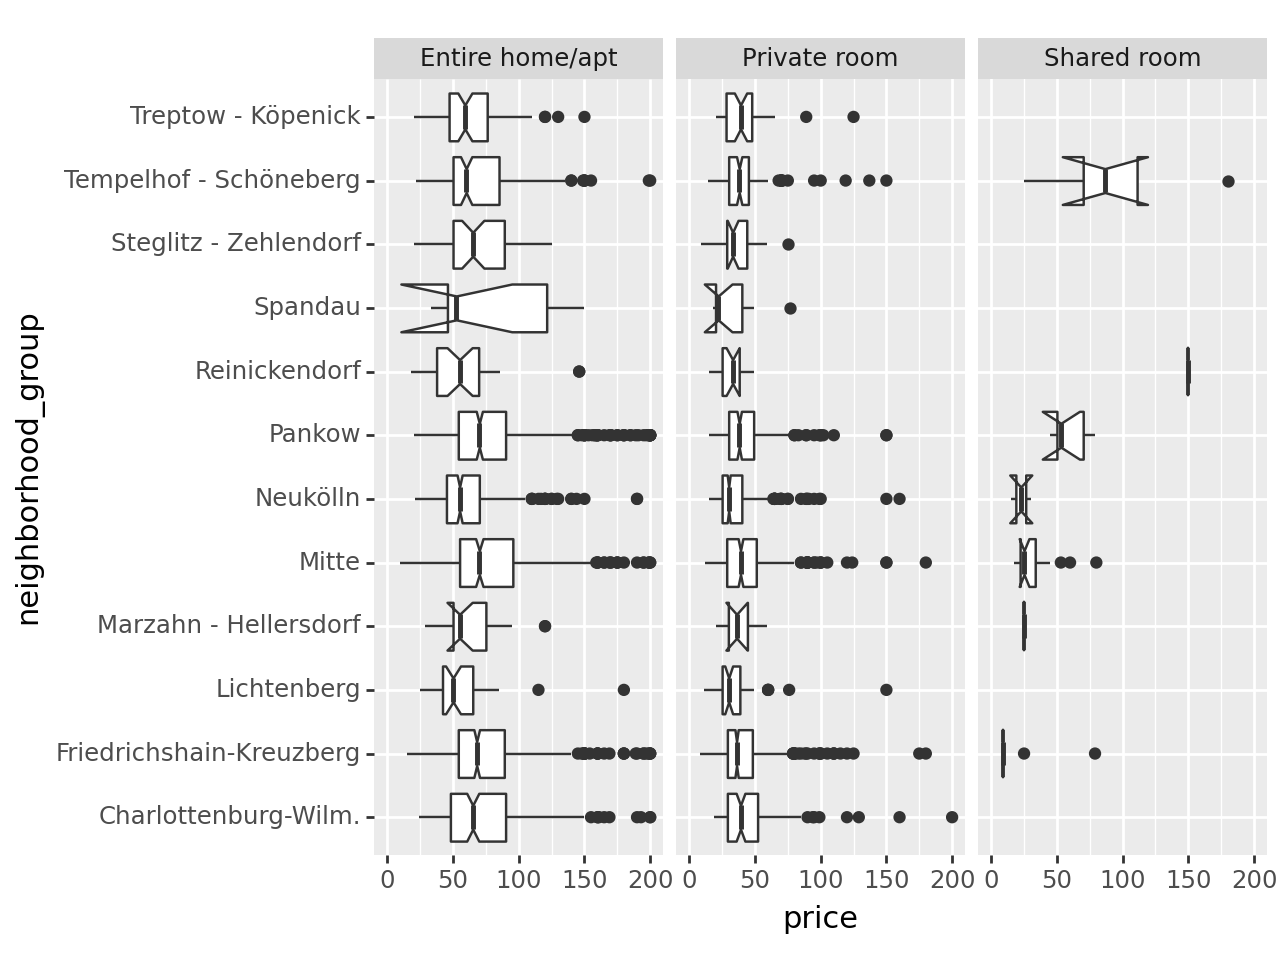

<Figure Size: (640 x 480)>

In [6]:
ggplot(listings, aes('neighborhood_group', 'price')) + \
    geom_boxplot(notch = True) + \
    facet_wrap('room_type') + \
    coord_flip() + \
    ylim(0, 200)
# Room type seems to have a larger inpact on listing's price,
# since listings of the same room type tend to have more similar
# inerquantile range and median (below 50 for private rooms and above 50 for entire home/apt).
# Additionally, the majority of outliers of the same room type fall into similar range
# (100-150 for private rooms and 150-200 for entire home/apt).
# It is worth mentioning that these assumptions are hard to investigate for shared rooms
# due to mutch smaller sample size of that category.

**5) Compute the age of each listing (you can use the columns about their reviews) and use a density plot to compare the distribution across `room_type`s. Do you see differences?**

c:\Users\EgleS\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_density : Removed 625 rows containing non-finite values.


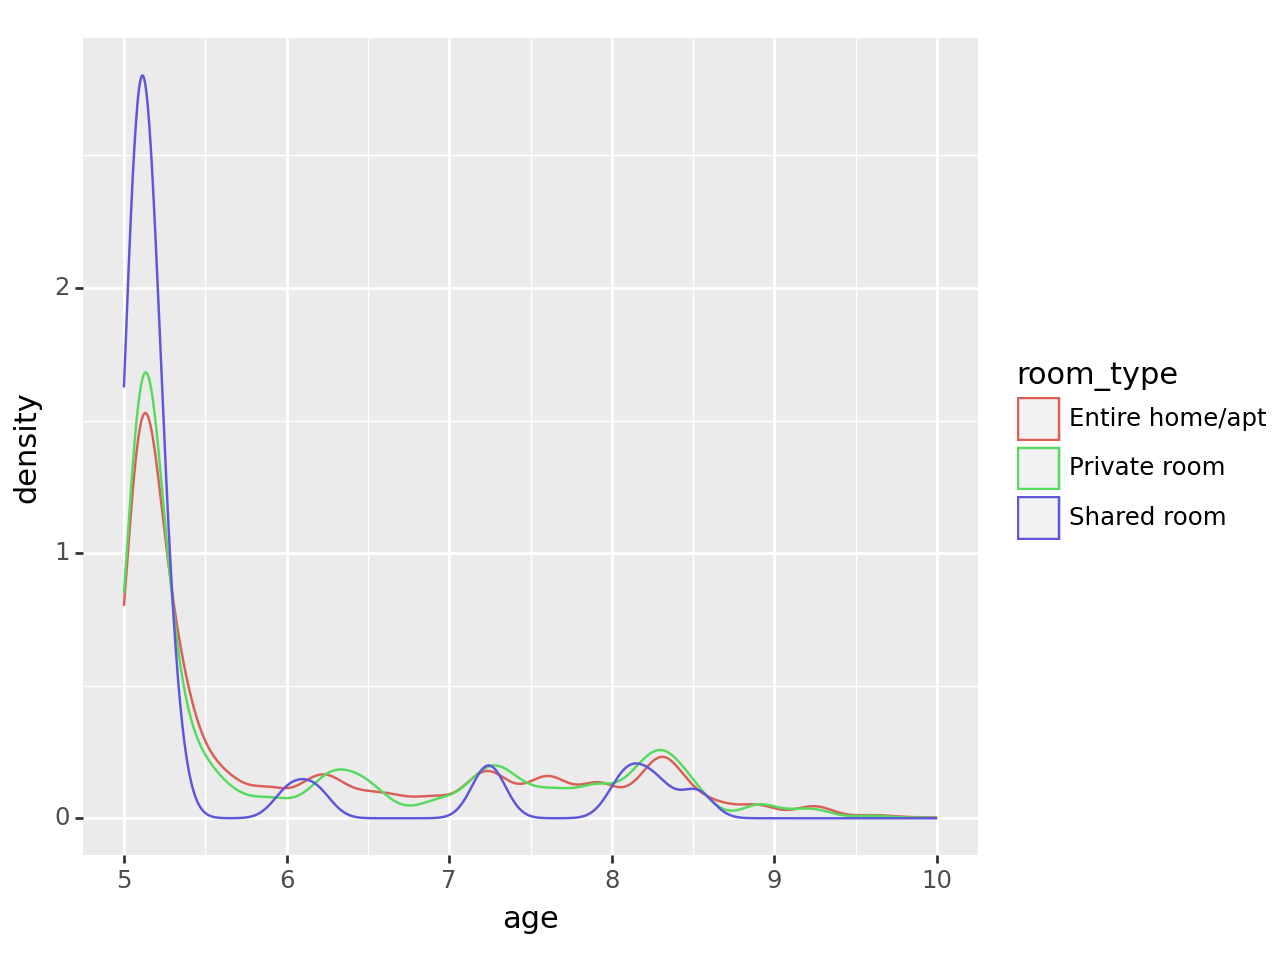

<Figure Size: (640 x 480)>

In [7]:
current_date = pd.to_datetime(datetime.now().date())
listings['last_review'] = pd.to_datetime(listings['last_review'], format='%Y-%m-%d')
listings = listings \
    .assign(age = current_date - listings.last_review)
listings['age'] = listings['age'] / np.timedelta64(365, 'D')

ggplot(listings, aes('age', color = 'room_type')) + \
    geom_density(bw=0.1) + \
    xlim(5, 10)

# All three room types follow similar distributions when it comes to listing's age.
# Shared room has sharper peaks, which can be explained by smaller sample (48),
# as compared to private romms and entire home/apt (2117 and 2835 respectively)

**6) Plot diamond `price` by `carat` and use transparency to help better visualizing the distribution.**

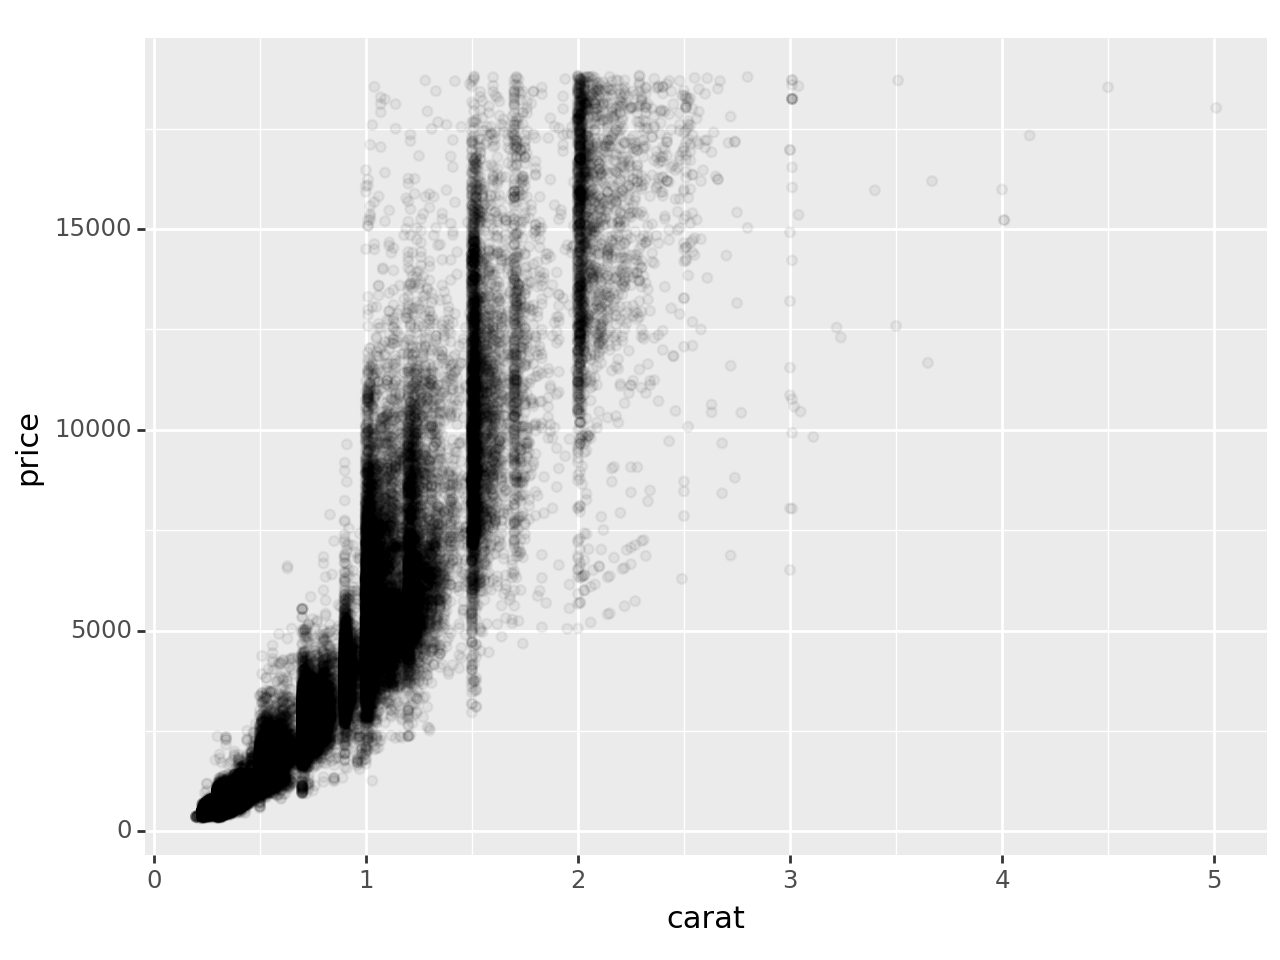

<Figure Size: (640 x 480)>

In [9]:
ggplot(diamonds, aes('carat', 'price')) + \
  geom_point(alpha = 0.05)

**7) Show the relationship between `room_type` and `price`, faceted by `neighborhood_group`. Modify the plot however you think it's best to show the relationship.**

c:\Users\EgleS\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_ydensity : Removed 74 rows containing non-finite values.
c:\Users\EgleS\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\stat_density.py:166: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
c:\Users\EgleS\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\stat_density.py:171: PlotnineWarning: Groups with fewer than 2 data points have been removed.
c:\Users\EgleS\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\stat_density.py:166: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
c:\Users\EgleS\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\stat_density.py:171: PlotnineWarning: Groups with fewer than 2 data points have been removed.


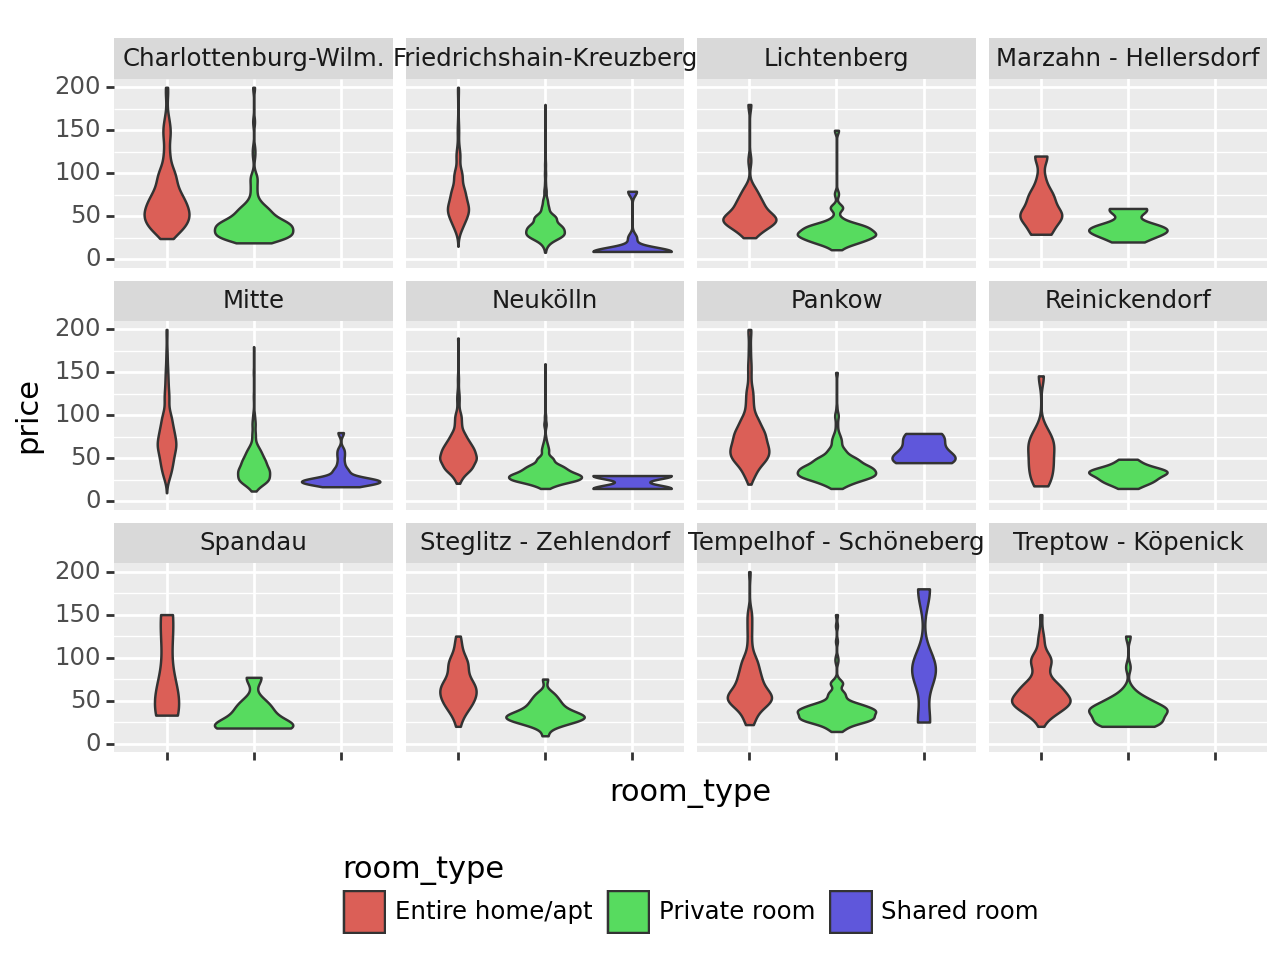

<Figure Size: (640 x 480)>

In [10]:
ggplot(listings, aes('room_type', 'price', fill = 'room_type')) + \
    geom_violin() + \
    facet_wrap('neighborhood_group') + \
    ylim(0, 200) + \
    theme(axis_text_x=element_blank(), legend_position='bottom')


**8) How are the three `room_type`s different in terms of their location?**

In [11]:
# The most obvious difference when comparing differen neighborhood groups
# is the whiskers length of all room types within that group.
# This means that certain neighborhood groups
# have more outliers across all room types than other groups.
# This maybe indicates that some neighborhood groups may have small exclusive districts
# with higher rent prices for all property types.

**9) Compute the correlations between all numerical variables in a data frame without referring to their column names; use `listings` as an example. Tip: check out method [`select_dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html).**

In [12]:
listings_numerical = listings.select_dtypes(include=['float64', 'int64'])
listings_numerical.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,age
id,1.000000,0.685396,-0.008506,0.036290,-0.022797,-0.097311,-0.279556,-0.125729,0.206953
host_id,0.685396,1.000000,-0.016801,0.002628,-0.053109,-0.086863,-0.192573,-0.075857,0.173460
latitude,-0.008506,-0.016801,1.000000,-0.096489,0.050154,0.024649,0.064838,0.062865,-0.025052
longitude,0.036290,0.002628,-0.096489,1.000000,-0.023191,-0.040235,-0.038923,-0.038131,0.059397
price,-0.022797,-0.053109,0.050154,-0.023191,1.000000,-0.018684,0.021994,0.014533,-0.041399
minimum_nights,-0.097311,-0.086863,0.024649,-0.040235,-0.018684,1.000000,-0.045278,-0.073456,0.052268
number_of_reviews,-0.279556,-0.192573,0.064838,-0.038923,0.021994,-0.045278,1.000000,0.906300,-0.418558
reviews_per_month,-0.125729,-0.075857,0.062865,-0.038131,0.014533,-0.073456,0.906300,1.000000,-0.454060
age,0.206953,0.173460,-0.025052,0.059397,-0.041399,0.052268,-0.418558,-0.454060,1.000000


**10) Create an _unambiguous_ and _nontrivial_ question, and its corresponding solution, as if you were writing the set of exercises for the lab. The question must cover at least 3 of the following aspects:**

- **Contingency table or barplot**
- **Histogram or density plot**
- **Boxplot or violin plot**
- **Scatterplot or contour plot**
- **Additional variables for color, line type, shape, etc. or alpha**
- **Facets**
- **Transformations and axes**
- **Open-ended conceptual question to explain some behavior**

**Please make it explicit which 3 of these aspects your question covers. You can use any of the datasets available on Brightspace.**

c:\Users\EgleS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


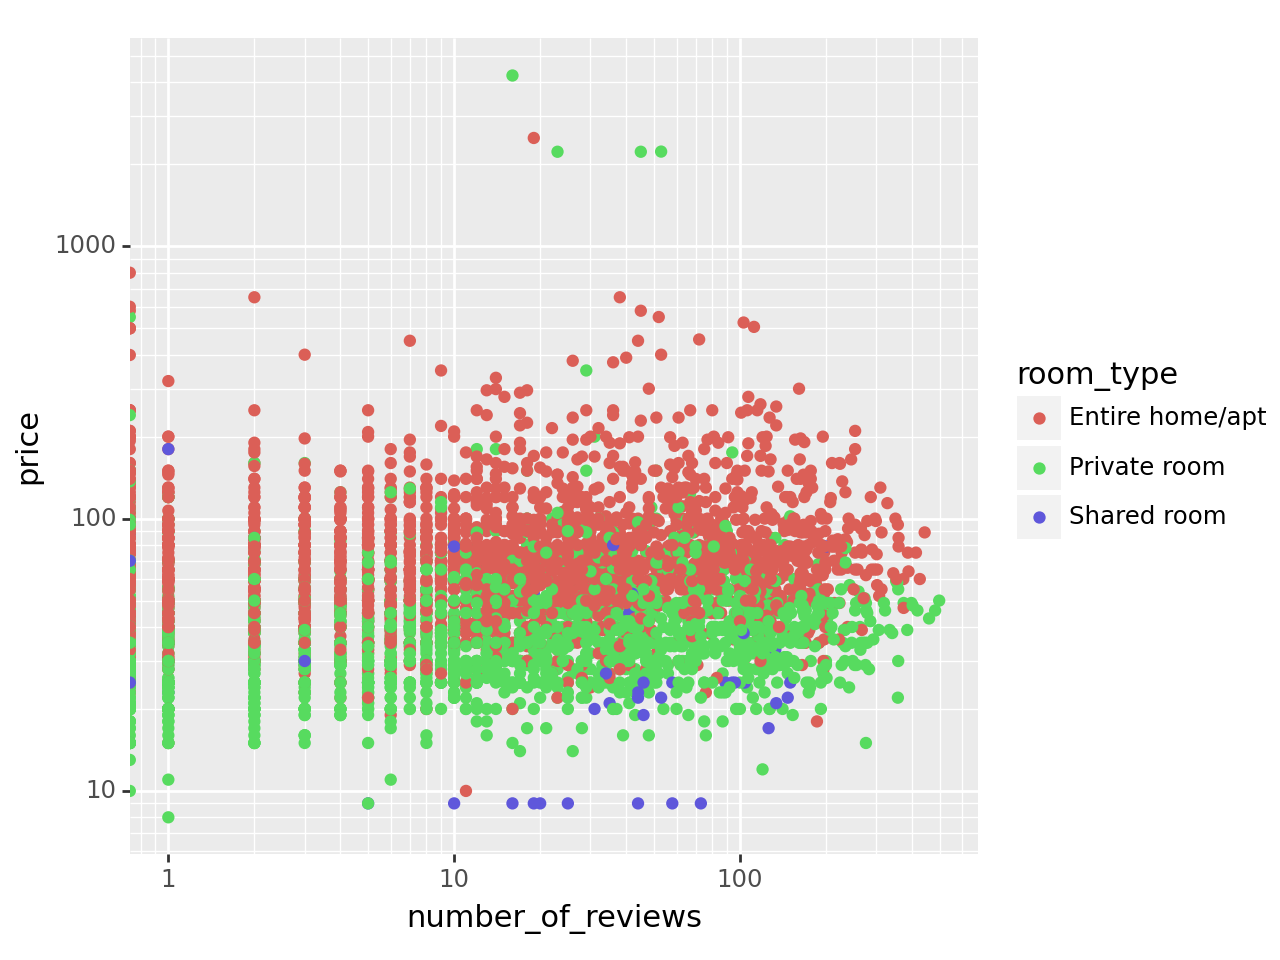

<Figure Size: (640 x 480)>

In [13]:
# Investigate the possible correlation between the listing's price and popularity
# for each room type by analysing a scatter plot.
# Assume that the number of reviews is an indicator for listing's popularity.
# The data points of different room types should have different colors.
# Make the graph more readabe by transforming x and y axis to the logarithmic scale.

# Scatter plot
# Additional variables for color
# Transformaion

ggplot(listings, aes('number_of_reviews', 'price', \
    color='room_type')) + \
    geom_point() + \
    scale_x_log10() + \
    scale_y_log10()